<a href="https://colab.research.google.com/github/trinhvanypro1/-DataAnalystDeepLearning/blob/main/Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bài 1:
Dữ liệu sử dụng trong lab này là tập dữ liệu về lượng nhựa, nicotine, CO trong
thuốc lá cỡ king

In [1]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/huynhhoc/DataAnalystDeepLearning/main/Data/04_CIGARET.csv')
data.head(10)

,KgTar,KgNic,KgCO,MnTar,MnNic,MnCO,FLTar,FLNic,FLCO
0,20,1.1,16,16,1.1,15,5,0.4,4
1,27,1.7,16,13,0.8,17,16,1.0,19
2,27,1.7,16,16,1.0,19,17,1.2,17
3,20,1.1,16,9,0.9,9,13,0.8,18
4,20,1.1,16,14,0.8,17,13,0.8,18
5,24,1.4,17,13,0.8,17,14,1.0,13
6,20,1.1,16,12,0.8,15,15,1.1,17
7,23,1.4,15,14,0.8,17,15,1.1,15
8,20,1.0,16,14,0.9,15,15,1.1,15
9,22,1.2,14,13,0.8,17,9,0.8,12


In [2]:
# Ex1:
import statsmodels.formula.api as smf
res = smf.ols('KgNic~KgTar+KgCO',data).fit()
print(res.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                  KgNic   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     1.211
Date:                Fri, 29 Oct 2021   Prob (F-statistic):              0.317
Time:                        03:52:39   Log-Likelihood:                 2.7726
No. Observations:                  25   AIC:                            0.4548
Df Residuals:                      22   BIC:                             4.111
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5937      0.793      2.010      0.0

Nhận xét:

  - Kiểm định giả thuyết hệ số hồi quy:

   + Hệ số hồi quy của biến KgTar = 0.0231 với P-value = 0,153 > 0,05. Do P-value > 0.05, điều này có ý nghĩa tác động của biến KgTar lên KgNic không có ý nghĩa thống kê.

   + Hệ số hồi quy của biến KgCO = -0.0525 với P-value = 0.340 > 0.05. Do P-value > 0.05 nên, điều này có ý nghĩa tác động của biến KgCO ên KgNic không có ý nghĩa thống kê.

  - Kiểm định mô hình (Kiểm định F):

   + Giá trị F = 1.211 với P-values = 0.317 > 0.05. Do P-value > 0.05 nên mô hình này cũng không có ý nghĩa thống kê.

In [3]:
#Ex 2:
resMn = smf.ols('MnNic~MnTar+MnCO',data).fit()
print(resMn.summary())

                            OLS Regression Results                            
Dep. Variable:                  MnNic   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     118.8
Date:                Fri, 29 Oct 2021   Prob (F-statistic):           1.62e-12
Time:                        03:53:49   Log-Likelihood:                 31.318
No. Observations:                  25   AIC:                            -56.64
Df Residuals:                      22   BIC:                            -52.98
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2507      0.057      4.399      0.0

***Nhận xét:***

  - *Kiểm định giả thuyết của hệ số hổi quy:*
    
    + Hệ số hồi quy của MnTar = 0,1007 với P-value = 0.000 < 0.05. Điều này có ý nghĩa tác động của biến MnTar lên MnNic có ý nghĩa thống kê.

    + Hệ số hồi quy của MnCO = -0,0454 với P-value = 0.000 < 0.05. Điều này có ý nghĩa tác động của biến MnCO lên MnNic có ý nghĩa thống kê.

  - *Kiểm định mô hình (Kiểm định F)*:
    + Giá trị F =0.015 với P-value = 1.62e-12 < 0.05. Do P-value < 0.05 nên mô hình này có ý nghĩa thống kê

In [7]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy import stats
import statsmodels.formula.api as smf
df = pd.read_csv('https://raw.githubusercontent.com/huynhhoc/DataAnalystDeepLearning/main/Data/crabs.txt',sep='\s+')

In [8]:
df.head(5)

,presz,postsz,inc,year,lf
0,113.6,127.7,14.1,NaN,0
1,118.1,133.2,15.1,NaN,0
2,119.9,135.3,15.4,NaN,0
3,126.2,143.3,17.1,NaN,0
4,126.7,139.3,12.6,NaN,0


Vẽ đồ thị scatter plot thể hiện mối tương quan giữa postmolt và premolt

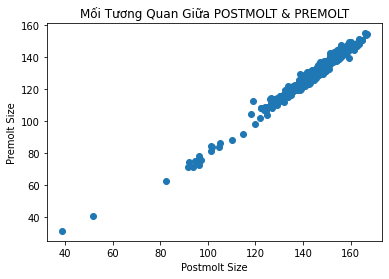

In [9]:
plt.plot(df['postsz'],df['presz'],'o')
plt.xlabel('Postmolt Size')
plt.ylabel('Premolt Size')
plt.title('Mối Tương Quan Giữa POSTMOLT & PREMOLT')
plt.show()

Tính hệ số tương quan giữa postmolt và premolt

In [10]:
print('Hệ số tương quan giữa Postmolt và Premolt: ',pearsonr(df['postsz'],df['presz']))

Hệ số tương quan giữa Postmolt và Premolt:  (0.9903699282533854, 0.0)
